In [124]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import k_means

from sklearn.datasets import load_iris, make_circles, make_moons, make_blobs
from skimage.data import chelsea, coffee

import pandas as pd

from sklearn import preprocessing

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

#weight in grams, length in centimeters, and the percentage ratio of height to length

## Fish 2

In [125]:
data = pd.read_csv('fish2.csv',header=None)

In [126]:
data

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [127]:
y = data.iloc[:,0]
X = data.iloc[:,1:]

In [128]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [137]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data[0]= label_encoder.fit_transform(data[0])
  
y = data[0]
y = np.asarray(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [130]:
[min(X[:,0]),max(X[:,0]),min(X[:,1]),max(X[:,1])]

[-1.1401483098347507,
 3.2170173315043353,
 -1.6073306714194031,
 2.8211363092179598]

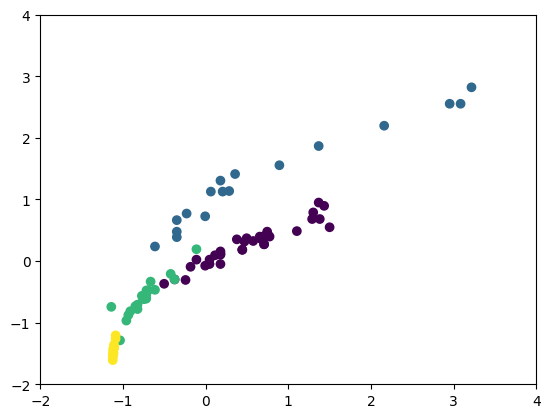

In [131]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-2, 4])
plt.ylim([-2, 4])
plt.show()

In [132]:
k = 4
centers, labels, u = k_means(X, n_clusters=k, algorithm='lloyd', init='random')

c:\Users\Usuario\miniforge3\envs\mlm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [133]:
labels

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

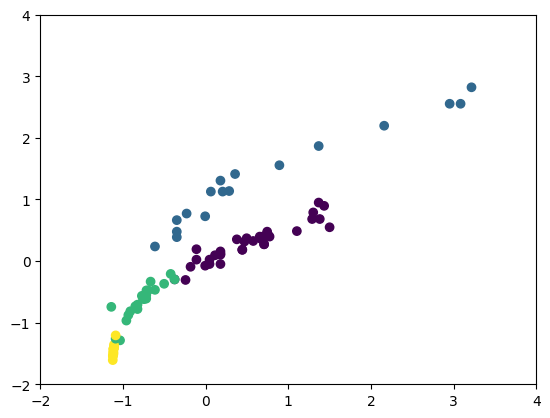

In [138]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)
plt.xlim([-2, 4])
plt.ylim([-2, 4])
plt.show()

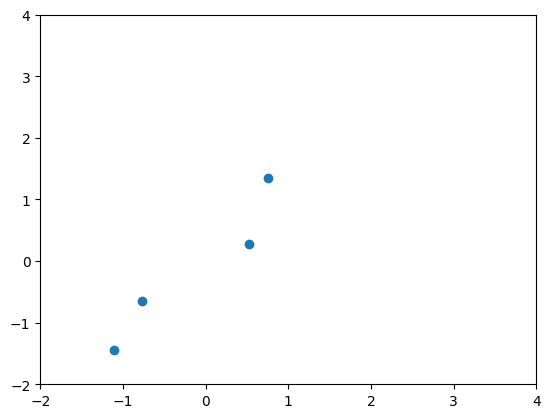

In [139]:
plt.figure()
plt.plot(centers[:,0], centers[:,1], 'o')
plt.xlim([-2, 4])
plt.ylim([-2, 4])
plt.show()

In [90]:
shifted_labels = []
for i in labels:
    if i == 3:
        shifted_labels.append(2)
    elif i == 1:
        shifted_labels.append(1)
    elif i == 2:
        shifted_labels.append(3)
    else:
        shifted_labels.append(0)
        
shifted_labels = np.array(shifted_labels)
print(shifted_labels)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [140]:
labels = ((2 * np.array(labels)) % 3)
print(labels)
print(y)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [141]:
(labels == y).sum() / len(y)

0.38823529411764707

## Fish 1

In [142]:
data = pd.read_csv('fish.csv')

In [143]:
data

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [144]:
y = data.iloc[:,0]
X = data.iloc[:,1:]

In [145]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [147]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data[0]= label_encoder.fit_transform(data.iloc[:,0])
  
y = data[0]
y = np.asarray(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [148]:
[min(X[:,0]),max(X[:,0]),min(X[:,1]),max(X[:,1])]

[-1.1162266959548657,
 3.507554149433765,
 -1.8736794986643803,
 3.2748915039499176]

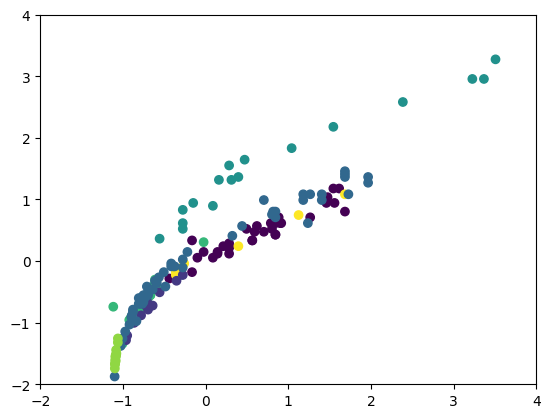

In [149]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-2, 4])
plt.ylim([-2, 4])
plt.show()

In [150]:
k = 7
centers, labels, u = k_means(X, n_clusters=k, algorithm='lloyd', init='random')

c:\Users\Usuario\miniforge3\envs\mlm\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [151]:
labels

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 0, 0, 0, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6])

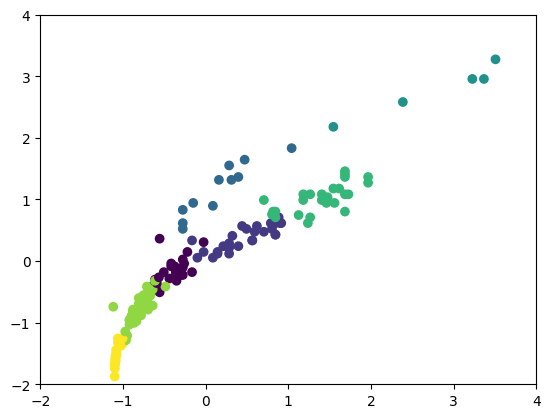

In [152]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)
plt.xlim([-2, 4])
plt.ylim([-2, 4])
plt.show()

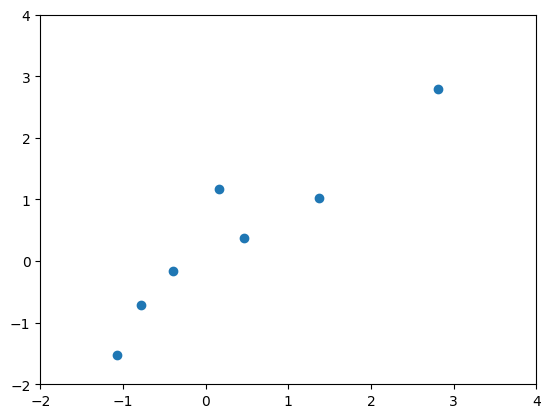

In [153]:
plt.figure()
plt.plot(centers[:,0], centers[:,1], 'o')
plt.xlim([-2, 4])
plt.ylim([-2, 4])
plt.show()

In [ ]:
shifted_labels = []
for i in labels:
    if i == 3:
        shifted_labels.append(2)
    elif i == 1:
        shifted_labels.append(0)
    elif i == 2:
        shifted_labels.append(3)
    elif i == 5
        shifted_labels.append(4)
    else:
        shifted_labels.append(0)
        
shifted_labels = np.array(shifted_labels)
print(shifted_labels)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
labels = ((2 * np.array(labels)) % 3)
print(labels)
print(y)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
(labels == y).sum() / len(y)

0.38823529411764707